<a href="https://colab.research.google.com/github/farhad06/For-Practics/blob/main/Emotion-Detection/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#!pip install neattext

In [5]:
#Load text classification pkg
import neattext.functions as nfx

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/emotion_dataset_raw.csv")

In [7]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [8]:
df.shape

(34792, 2)

In [9]:
df.columns

Index(['Emotion', 'Text'], dtype='object')

In [10]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

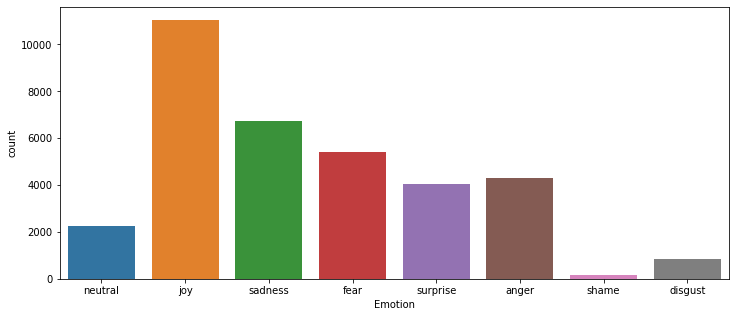

In [16]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(12,5)
sns.countplot(x='Emotion',data=df)

In [17]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [18]:
df.head(2)

,Emotion,Text,Clean_Text
0,neutral,Why ?,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.


In [19]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
df.head(2)

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.


In [20]:
#Remove puncuation
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [23]:
df['Text'][45]

'&quot;The family is the bedrock of our society. Unless we protect it with the institution of marriage, our country will fall.&quot;  '

In [24]:
df['Clean_Text'][45]

'quotThe family bedrock society protect institution marriage country fallquot'

In [25]:
#Remove HTML Tag
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_hashtags)

In [26]:
#Remove spacial Character
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_special_characters)

In [28]:
#Remove Numbers
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_numbers)

In [29]:
df.head(15)

,Emotion,Text,Clean_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
5,fear,I'm expecting an extremely important phonecall...,Im expecting extremely important phonecall min...
6,sadness,.Couldnt wait to see them live. If missing th...,Couldnt wait live missing NH wasnt painful enu...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip Stop op een moment dat je het hele ...
8,surprise,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Drummer Boy bij op verzoek van welke uitvoer...


In [53]:
import spacy
nlp=spacy.load('en_core_web_sm')
def preprocess(text):
  clean_text=[]
  doc=nlp(text)
  for token in doc:
    if token.is_punct or token.is_stop:
      continue
    else:
      clean_text.append(token.lemma_)
  return " ".join(clean_text)      

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [54]:
df['Clean_Text']=df['Clean_Text'].apply(preprocess)

In [41]:
df['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [55]:
df['Emotion_Number']=df['Emotion'].map({'anger':0,'disgust':1,'fear':2,'joy':3,'neutral':4,'sadness':5,'shame':6,'surprise':7})


In [56]:
df.head(15)

,Emotion,Text,Clean_Text,Emotion_Number
0,neutral,Why ?,,4
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,3
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY homegirl baby FUNERAL MAN HATE funeral sho...,5
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular fe...,3
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamaze nga ako e b...,3
5,fear,I'm expecting an extremely important phonecall...,m expect extremely important phonecall minute,2
6,sadness,.Couldnt wait to see them live. If missing th...,not wait live miss nh not painful enuf Suraj s...,5
7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip stop op een moment dat je het hele...,7
8,surprise,En dan krijg je ff een cadeautje van een tweep...,en dan krijg je ff een cadeautje van een tweep,7
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,drummer boy bij op verzoek van welke uitvoe...,7


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Clean_Text,df.Emotion,test_size=0.25,random_state=42)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [64]:
from sklearn.linear_model import LogisticRegression
clf=Pipeline([('BOW',CountVectorizer()),('Logistic_Regression',LogisticRegression())])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       anger       0.61      0.55      0.58      1053
     disgust       0.61      0.18      0.28       253
        fear       0.73      0.64      0.68      1362
         joy       0.62      0.76      0.68      2773
     neutral       0.60      0.70      0.64       575
     sadness       0.60      0.58      0.59      1661
       shame       0.91      0.65      0.75        31
    surprise       0.53      0.41      0.46       990

    accuracy                           0.62      8698
   macro avg       0.65      0.56      0.58      8698
weighted avg       0.62      0.62      0.61      8698



In [65]:
clf.score(X_test,y_test)

0.6196826856748678

In [60]:
from sklearn.linear_model import LogisticRegression
clf_tf_idf=Pipeline([('TF-IDF',TfidfVectorizer()),('Logistic_Regression',LogisticRegression())])
clf_tf_idf.fit(X_train,y_train)
y_pred=clf_tf_idf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57      1053
           1       0.77      0.07      0.12       253
           2       0.74      0.61      0.67      1362
           3       0.55      0.82      0.66      2773
           4       0.64      0.30      0.40       575
           5       0.59      0.57      0.58      1661
           6       0.86      0.19      0.32        31
           7       0.60      0.38      0.47       990

    accuracy                           0.60      8698
   macro avg       0.67      0.43      0.47      8698
weighted avg       0.61      0.60      0.58      8698



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
clf_tf_idf.score(X_test,y_test)

0.5962290181650954

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=Pipeline([('BOW',CountVectorizer()),('Random-Forest',RandomForestClassifier())])
clf_rf.fit(X_train,y_train)
y_pred_rf=clf_rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.63      0.50      0.56      1053
           1       0.84      0.14      0.24       253
           2       0.83      0.62      0.71      1362
           3       0.60      0.71      0.65      2773
           4       0.29      0.81      0.43       575
           5       0.60      0.51      0.55      1661
           6       0.87      0.87      0.87        31
           7       0.68      0.32      0.44       990

    accuracy                           0.58      8698
   macro avg       0.67      0.56      0.56      8698
weighted avg       0.64      0.58      0.58      8698



In [47]:
clf_rf.score(X_test,y_test)

0.5784088296160037

In [50]:
%%time
from sklearn.neighbors import KNeighborsClassifier
#1. create a pipeline object
clf_knn=Pipeline([('vectorizer',CountVectorizer()),
              ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))
              ])



#2. fit with X_train and y_train
clf_knn.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred=clf_knn.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.04      0.07      1053
           1       0.67      0.01      0.02       253
           2       0.84      0.16      0.27      1362
           3       0.67      0.14      0.24      2773
           4       0.08      0.98      0.14       575
           5       0.67      0.10      0.17      1661
           6       0.00      0.00      0.00        31
           7       0.63      0.02      0.05       990

    accuracy                           0.16      8698
   macro avg       0.50      0.18      0.12      8698
weighted avg       0.62      0.16      0.17      8698

CPU times: user 2.9 s, sys: 363 ms, total: 3.26 s
Wall time: 3.26 s


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
clf_knn.score(X_test,y_test)

0.1618762934007818

In [66]:
clf.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [67]:
import pickle
with open('emotion_logistic_regression.pkl','wb') as f:
  pickle.dump(clf,f)